# Python for Data Science

Machine Learning 5 - Unsupervised Learning, Non-linear Machine Learning Models

# What is Unsupervised Machine Learning?

- Supervised ML: 
 - Labels available (X and y)
 - Predictions: most likely label / target variable
- Unsupervised ML: 
 - No labels available (only X)
 - Many unsupervised learning algorithms are used for *Dimensionality Reduction*
 - Predictions: a *latent variable* hidden in the data

# Why Unsupervised Machine Learning?

- Often, unlabeled data is easier to get
- Unsupervised learning can help to structure the data
- Example: 
 - Instead of inspecting thousands of text documents, learn a topic model and inspect the topics

# Clustering

You can think of clustering as an unsupervised approach to classification: A cluster model learns to group data into clusters.


## K-Means Algorithm

Given a data set $X\in R^{N \times D}$ clustering finds $K$ clusters $\mu_k$ such that the sum of distances between the data points and their closest cluster is minimal. 

For i iterations:

1. Assign each data point $x$ to their closest cluster $\mu_k$
2. Update $\mu_k$ to the mean of the members in that cluster

## Old Faithful Geyser Data

Two features:
- waiting time between two consecutive eruptions (in minutes)
- duration of the eruption (in minutes) for the [Old Faithful geyser](https://en.wikipedia.org/wiki/Old_Faithful).


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = [9, 3]
import seaborn; seaborn.set()

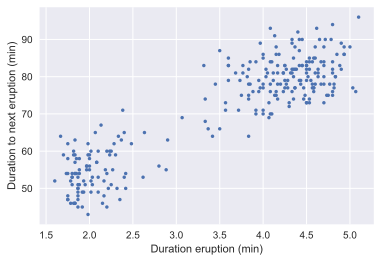

In [2]:
import pandas as pd
df = pd.read_csv('data/old-faithful.csv')
plt.plot(df['eruptions'],df['waiting'],'.')
plt.xlabel("Duration eruption (min)")
plt.ylabel("Duration to next eruption (min)");

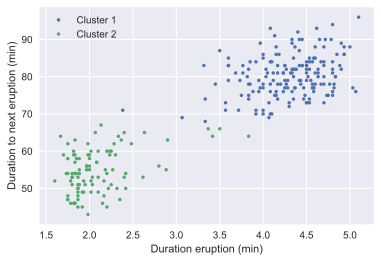

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0).fit(df[['eruptions','waiting']])
clusters = km.predict(df[['eruptions','waiting']])

plt.plot(df.loc[clusters==0, 'eruptions'],df.loc[clusters==0, 'waiting'],'.',
        df.loc[clusters==1, 'eruptions'],df.loc[clusters==1, 'waiting'],'.');
plt.xlabel("Duration eruption (min)")
plt.ylabel("Duration to next eruption (min)");
plt.legend(["Cluster 1", "Cluster 2"]);

## K-Means: Pros / Cons


Pro:
- Simple to implement
- Often good enough clustering

Cons:
- Euclidean distance often not the best choice
- Setting the right number of clusters can be difficult


## Hyperparameters:

Number of clusters

## Speed and Memory Complexity

Speed:
- Training: 
 - Naive implementation scales expontially with number of data points
 - Stochastic approximation scales with number of clusters
- Prediction: Scales with number of clusters

Memory:
- Scales with number of dimensions and clusters

# Limitations of Linear ML Models

Linear models are limited to **linear** relationships between data and target variable


## What's a Linear Relationship Between Data and Target?


### Regression

Anything that can be modeled as

$$
f(x) = c_1 + c_2 x
$$

or that looks like a line when you plot data vs target

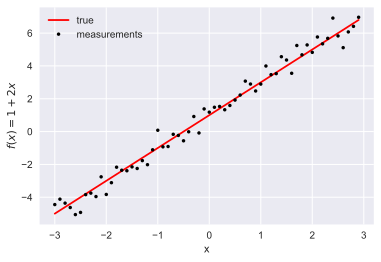

In [4]:
import numpy as np
x = np.arange(-3,3,.1)
y = 1 + x*2
measurements = y + np.random.normal(size=x.shape) * .5
plt.plot(x, y,'r-', x, measurements,'k.')
plt.xlabel('x')
plt.ylabel('$f(x)=1+2x$');
plt.legend(['true','measurements']);

### Classification

If the classes can be separated by a line, the classification can be done with a linear model.

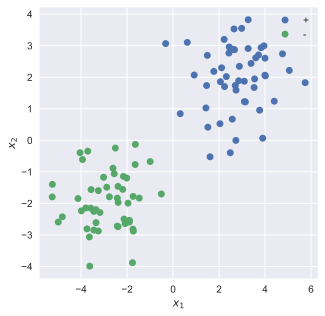

In [5]:
N = 50
plt.figure(figsize=[5,5])
x_pos = np.random.randn(N, 2) + np.array([3,2])
x_neg = np.random.randn(N, 2) - np.array([3,2])
plt.plot(x_pos[:,0], x_pos[:,1],'o', x_neg[:,0], x_neg[:,1], 'o')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');
plt.legend(['+','-'])

## What's a Non-Linear Relationship Between Data and Target?


### Non-linear Regression Problems

Anything for which the relationship between features and target cannot be described by a line.

Example: $$ f(x) = x^2$$

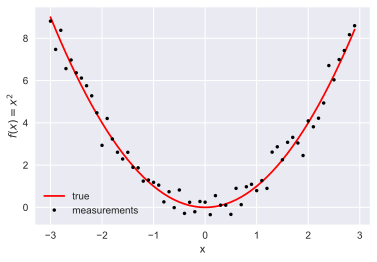

In [6]:
x = np.arange(-3,3,.1)
y = x**2
measurements = y + np.random.normal(size=x.shape) * .5
plt.plot(x, y,'r-', x, measurements,'k.')
plt.xlabel('x')
plt.ylabel('$f(x)=x^2$');
plt.legend(['true','measurements']);

### Classification

If the classes cannot be separated by **one line**, it's a non-linear classification problem.

Example: The XOR problem

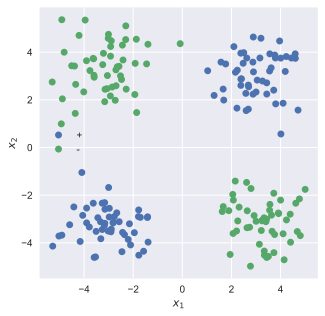

In [7]:
N = 50
plt.figure(figsize=[5,5])
x_pos = np.vstack([np.random.randn(N, 2) + np.array([3,3]), 
                   np.random.randn(N, 2) - np.array([3,3])])
x_neg = np.vstack([np.random.randn(N, 2) + np.array([-3,3]), 
                   np.random.randn(N, 2) + np.array([3,-3])])
plt.plot(x_pos[:,0], x_pos[:,1],'o', x_neg[:,0], x_neg[:,1], 'o')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');
plt.legend(['+','-']);

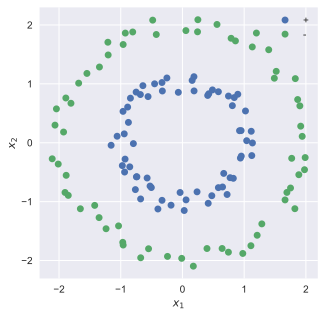

In [8]:
N = 500
plt.figure(figsize=[5,5])
xrange = np.arange(-np.pi,np.pi,.1)
x_pos = np.vstack([np.sin(xrange),np.cos(xrange)]).T
x_pos += np.random.randn(*x_pos.shape) * .1
x_neg = np.vstack([np.sin(xrange),np.cos(xrange)]).T * 2
x_neg += np.random.randn(*x_pos.shape) * .1
plt.plot(x_pos[:,0], x_pos[:,1],'o', x_neg[:,0], x_neg[:,1], 'o')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');
plt.legend(['+','-']);


# Non-linear Features

- In some cases optimal non-linear feature transformations are known
- If we know the right feature transformation, non-linear problems can be transformed into linear ones
- In many cases the optimal non-linear feature extractors are not known
- For these cases, non-linear models can learn good feature extractors:
    - computer vision
    - speech to text / text to speech models
    

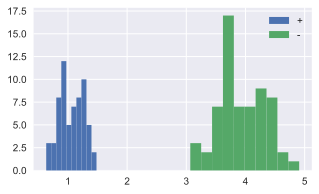

In [9]:
# a simple example of when an optimal non-linear feature transformation is known
plt.figure(figsize=[5,3])

x_pos_dist_from_origin = (x_pos**2).sum(axis=1)
x_neg_dist_from_origin = (x_neg**2).sum(axis=1)

plt.hist(x_pos_dist_from_origin)
plt.hist(x_neg_dist_from_origin)
plt.legend(['+','-']);


# Non-Linear Classifiers

- Linear classifiers fit lines to separate classes
- Non-linear classifiers can fit complex decision boundaries
- Non-linear classifiers overfit more easily
- Feature engineering is important for non-linear classifiers, too
- With rich features, linear classifiers can do non-linear separation

We will not cover here the mathematical derivation of non-linear models, will be covered in other courses.

We will focus on their application in data science:
- APIs (sklearn, keras)
- Important hyperparameters
- Pitfalls and space/memory complexity

## Examples

- K-Nearest Neighbor Classifiers
- Decision Trees
- Random Forests
- Neural Networks
- Kernel Machines (Gaussian Processes, Non-linear Support Vector Machines)

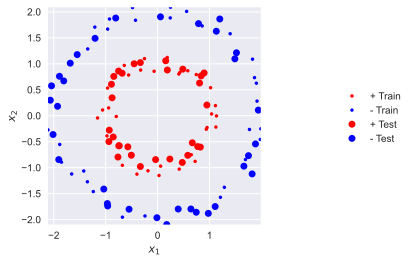

In [10]:
from sklearn.model_selection import train_test_split
X = np.vstack([x_pos,x_neg])
y = np.hstack([np.ones(x_pos.shape[0]),np.zeros(x_neg.shape[0])]).reshape(x_neg.shape[0]+x_pos.shape[0],1).flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

plt.plot(X_train[y_train.flatten()==1,0], X_train[y_train.flatten()==1,1],'r.', 
             X_train[y_train.flatten()==0,0], X_train[y_train.flatten()==0,1],'b.', 
             X_test[y_test.flatten()==1,0], X_test[y_test.flatten()==1,1],'ro', 
             X_test[y_test.flatten()==0,0], X_test[y_test.flatten()==0,1],'bo', )

plt.xlabel('$x_1$')
plt.ylabel('$x_2$');
plt.legend(['+ Train','- Train', '+ Test', '- Test'],bbox_to_anchor=(1.7, .65));
plt.xlim([X[:,0].min(), X[:,0].max()])
plt.ylim([X[:,1].min(), X[:,1].max()])
plt.gca().set_aspect('equal');

In [11]:
def plot_predictions(model, X, X_train, X_test, y_train, y_test):
    plt.figure(figsize=[5,5])
    plt.clf()
    xx, yy = np.meshgrid(np.arange(X[:,0].min(), X[:,0].max(), .02),
                         np.arange(X[:,1].min(), X[:,1].max(), .02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    if Z.shape[-1] != Z.shape[0]:
        Z = Z[:,1].reshape(xx.shape)
    else:
        Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=.3)
    plt.plot(X_train[y_train.flatten()==1,0], X_train[y_train.flatten()==1,1],'r.', 
             X_train[y_train.flatten()==0,0], X_train[y_train.flatten()==0,1],'b.', 
             X_test[y_test.flatten()==1,0], X_test[y_test.flatten()==1,1],'ro', 
             X_test[y_test.flatten()==0,0], X_test[y_test.flatten()==0,1],'bo', )

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$');
    plt.legend(['+ Train','- Train', '+ Test', '- Test'],bbox_to_anchor=(1.7, .65));
    plt.xlim([X[:,0].min(), X[:,0].max()])
    plt.ylim([X[:,1].min(), X[:,1].max()])
    plt.colorbar()
    plt.gca().set_aspect('equal')


# K-Nearest Neighbor Classification

Assigns majority label of k closest neighbors

Pro: 
- Good prediction accuracy
- Only one hyperparameter

Cons: 
- Slow predictions


## Hyperparameters:

*k*, number of nearest neighbors


## Speed and Memory Complexity

Speed:
- Training: No training required
- Prediction: scales **quadratically** with data points
- Naive implementation won't scale to more than some 1000 data points
- Speedups by:
    - Trees for finding neighbors efficiently
    - Locality sensitive hashing

Memory:
- All datapoints or distance matrix need to be stored

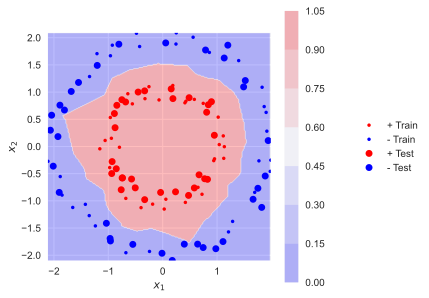

In [12]:
from sklearn import neighbors

n_neighbors = 1
knn = neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
plot_predictions(knn, X, X_train, X_test, y_train, y_test)

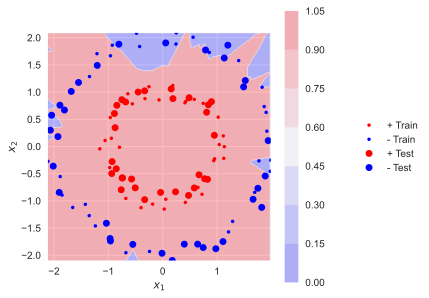

In [13]:
from sklearn import neighbors

n_neighbors = 20
knn = neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
plot_predictions(knn, X, X_train, X_test, y_train, y_test)

# Decision Trees

Find right class by asking binary questions for each feature

![decision-tree.png](figures/decision-tree.png)


## Pros / Cons


Pro:
- Easy to interpret
- Simple to implement
- Deals with different feature types

Cons:
- Overfitting

## Hyperparameters:

Splitting strategies / criteria

Depth of tree


## Speed and Memory Complexity

Speed:
- Training: Scales with number of nodes
- Prediction: Scales with number of nodes

Memory:
- Scales with number of nodes

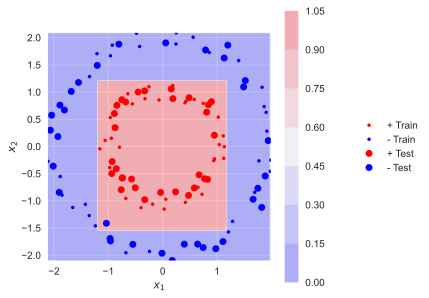

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X_train, y_train)

plot_predictions(tree, X, X_train, X_test, y_train, y_test)

# Random Forests

Ensemble model of decision trees

Single decision trees learn on 
- randomly (with replacement) drawn data points 
- randomly chosen features of a set of data points

This prevents overfitting

## Pros / Cons


Pro:
- Easy to implement
- Parallel training of trees
- Very good prediction accuracy
- Little overfitting

Cons:
- Difficult to interpret
- Some implementations don't scale well with number of features

## Hyperparameters:

Same as for Decision Trees

Number of trees

Sampling strategies


## Speed and Memory Complexity

Speed:
- Training: As with decision trees, multiplied by number of trees (if not parallelized)
- Prediction: As during training

Memory:
- Scales with number of nodes and trees

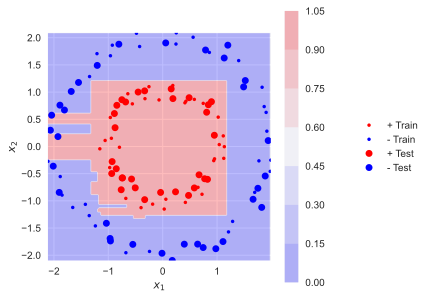

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=None,
        min_samples_split=2, random_state=0)

rf.fit(X_train, y_train)
plot_predictions(rf, X, X_train, X_test, y_train, y_test)

# Neural Networks

- We already have seen a simple neural network without hidden layers
- Usually neural networks or deep learning refers to networks with many hidden layers
- Each hidden layer performs a non-linear feature extraction step


## Hyperparameters:

Network architecture:
- type of layer
- number of layers
- number of hidden units
- non-linearities
- ...

Loss function

Optimization parameters:
- SGD variant
- batch size
- stopping criterion
- learning rate

Data augmentation strategies


## Speed and Memory Complexity

Speed:
- Training: Can become costly / prohibitively slow without GPUs
- Prediction: Similar 

Memory:
- scales with number of hidden units / output units
- some architectural decisions influence number of parameters:
    - convolutional layers
    - recurrent networks

In [16]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=2))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X_train, to_categorical(y_train),
          epochs=100,
          batch_size=20)


2022-01-25 23:16:18.845223: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/felix/anaconda3/envs/pdds-2021/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7585 - accuracy: 0.3810
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5873
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7667 - accuracy: 0.5079
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5079
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6689 - accuracy: 0.5238
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.4921
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.5556
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.6984
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.6032
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5911 - accuracy: 0.7937
Epoch 11/100
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 0.9683
Epoch 85/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.9365
Epoch 86/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.9841
Epoch 87/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 1.0000
Epoch 88/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.9524
Epoch 89/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.9524
Epoch 90/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9841
Epoch 91/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 1.0000
Epoch 92/100
4/4 [==============================] - 0s 2ms/step - loss: 0.1646 - accuracy: 0.9365
Epoch 93/100
4/4 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9841
Epoch 94/100
4/4 [===============

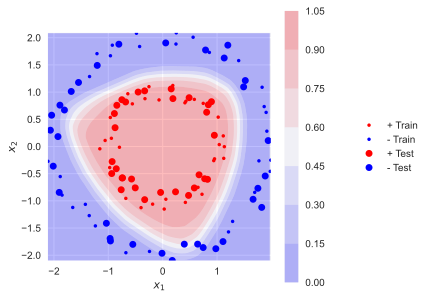

In [17]:
plot_predictions(model, X, X_train, X_test, y_train, y_test)

# Gaussian Process Regression


## Pros / Cons


Pro:
- Easy to implement
- Good predictions
- Uncertainties of predictions

Cons:
- Difficult to interpret
- Difficult to scale to many data points

## Hyperparameters:

Kernel parameters

Optimization parameters


## Speed and Memory Complexity

Speed:
- Training: Cubic in the number of data points
- Prediction: Scales with number of training datapoints

Memory:
- Scales with number of training data points

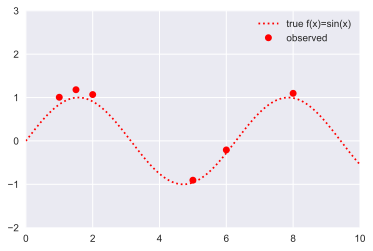

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def f(x):
    """The function to predict."""
    return np.sin(x)

xdata = np.array([[1, 1.5, 2, 5, 6, 8]]).T
ydata = f(xdata)
ydata_with_noise = ydata + .2 * np.random.random(ydata.shape)

xfit = np.linspace(0, 10, 1000)
plt.plot(xfit, f(xfit), 'r:', label='true f(x)=sin(x)')
plt.plot(xdata, ydata_with_noise, 'or', label='observed')

plt.xlim(0, 10);
plt.ylim(-2, 3);
plt.legend();

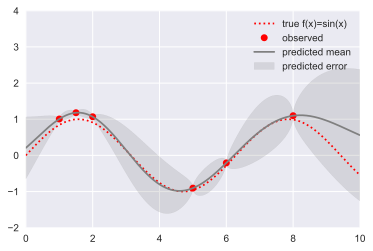

In [19]:
# Instantiate a Gaussian Process model
kernel = RBF(.5, (1e-2, 1e1))
gp = GaussianProcessRegressor(kernel=kernel)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(xdata, ydata_with_noise)

yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

plt.plot(xfit, f(xfit), 'r:', label='true f(x)=sin(x)')
plt.plot(xdata, ydata_with_noise, 'or', label='observed')
plt.plot(xfit, yfit, '-', color='gray', label='predicted mean')

plt.fill_between(xfit, yfit.flatten() - dyfit, yfit.flatten() + dyfit,
                 color='gray', alpha=0.2, label='predicted error')
plt.ylim(-2, 4);
plt.xlim(0, 10);
plt.legend();

## Extra Task: Non-linear Classification and Nested Cross-Validation

Load the iris dataset from sklearn and train a non-linear classification model of your choice on it. 
Make sure to optimize over **every** hyperparameter in the inner cross-validation loop. Report the final accuracy score.

You might want to use the following import

```python
from sklearn.model_selection import  GridSearchCV, cross_val_score, KFold
```

```python

# Some nonlinear model
model = ...

# Set up possible values of parameters to optimize over
p_grid = {}

# Choose cross-validation techniques for the inner and outer loops,
inner_cv = KFold ...
outer_cv = KFold ...

# GridSearch cross-validation object hyperparameter optimization
clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv)

# Nested CV with parameter optimization
nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
nested_score.mean()
```